In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from s import Sample, ZHyp, THyp, ChiHyp, Z2Hyp, T2Hyp, FHyp, AltHypKind

In [2]:
def plot_dist(dist, label=''):
    domain = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 200)
    values = dist.pdf(domain)
    
    plt.plot(domain, values, label=label)
    plt.fill_between(domain, 0, values, alpha=.2)
    plt.show()

Sample 1: m=8.906, s=0.9000518503582632, s^2=0.8100933333333333


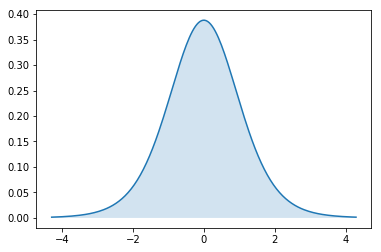

Crit values:
(-1.2581418099469051, 1.2581418099469051)
Criterion value: -0.3302633064278515
P-value: 0.6256204826828377
H0


In [15]:
def v1():
    sample1 = Sample.from_data(
        '1',
        np.array([8.60, 9.70, 7.83, 8.77, 9.15, 9.40, 9.36, 8.90, 10.22, 7.13])
    )
    
    sample1.describe()
    
    hyp = THyp(kind=AltHypKind.RIGHT, m=9, sample=sample1)
    alpha = 0.12
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')

v1()


Sample 1: m=10.4738, s=0.3382339098579234, s^2=0.11440217777777785
Sample 2: m=10.5522, s=0.532955240980787, s^2=0.2840412888888887


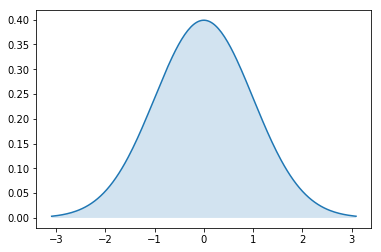

Crit values:
(-0.91536508784281401, 0.91536508784281434)
Criterion value: -0.4409646897881731
P-value: 0.32961928002396845
H0


-1.2815515655446004

In [3]:
def v2():
    sample1 = Sample.from_data(
        '1',
        np.array([10.73, 9.878, 10.12, 10.58, 10.56, 10.50, 10.93, 10.32, 10.23, 10.89])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([9.594, 11.37, 10.53, 11.04, 10.47, 10.30, 10.90, 9.878, 10.84, 10.60])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = Z2Hyp(kind=AltHypKind.LEFT, sigma1=0.35, sigma2=0.44)
    alpha = 0.18
    
    real_dist1 = stats.norm(10.5, 0.35)
    real_dist2 = stats.norm(10.5, 0.44)
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v2()


Sample 1: m=27.893999999999995, s=1.0288488713120114, s^2=1.0585299999999997
Sample 2: m=29.38888888888889, s=0.8676324746752574, s^2=0.7527861111111112


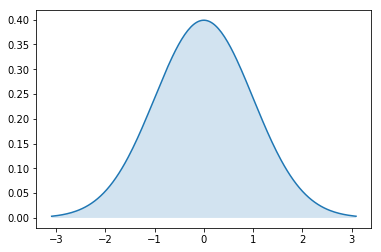

Crit values:
(-1.2815515655446004, 1.2815515655446004)
Criterion value: -2.977889946293517
P-value: 0.002902401802124835
H1


In [20]:
def v3():
    sample1 = Sample.from_data(
        '1',
        np.array([27.84, 27.65, 26.47, 28.18, 29.33])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([29.28, 28.40, 28.90, 30.47, 30.48, 30.34, 29.44, 28.23, 28.96])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = Z2Hyp(kind=AltHypKind.TWO_SIDED, sigma1=0.9, sigma2=0.9)
    alpha = 0.20
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v3()

Sample 1: m=18.973, s=2.544597981781972, s^2=6.474978888888886
Sample 2: m=19.572, s=1.662633787432191, s^2=2.7643511111111123


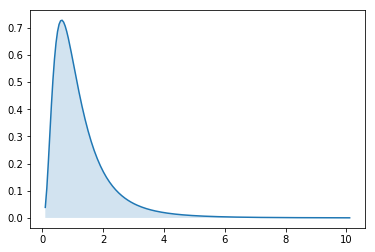

Crit values:
(0.47298630971728645, 2.1142260979978902)
Criterion value: 2.342314209965286
P-value: 0.11041740287916424
H1


In [4]:
def v4():
    sample1 = Sample.from_data(
        '1',
        np.array([19.29, 20.04, 23.29, 16.00, 21.47, 16.05, 19.02, 15.34, 20.23, 19.00])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([19.11, 17.81, 23.75, 20.70, 18.51, 19.72, 19.38, 18.49, 19.32, 18.93])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = FHyp(kind=AltHypKind.RIGHT, sample1=sample1, sample2=sample2)
    alpha = 0.14
    
    real_dist1 = stats.norm(18.5, 2.20)
    real_dist2 = stats.norm(19.2, 1.65)
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v4()

Sample 1: m=8.906, s=0.9000518503582632, s^2=0.8100933333333333


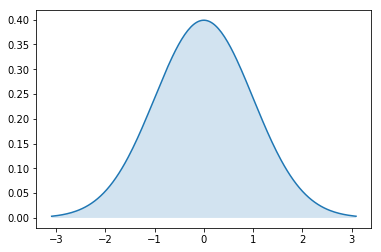

Crit values:
(-1.2815515655446004, 1.2815515655446004)
Criterion value: -0.3963388000744344
P-value: 0.6918551075069946
H0


In [14]:
def v5():
    sample1 = Sample.from_data(
        '1',
        np.array([8.60, 9.70, 7.83, 8.77, 9.15, 9.40, 9.36, 8.90, 10.22, 7.13])
    )
    
    sample1.describe()
    
    hyp = ZHyp(kind=AltHypKind.TWO_SIDED, m=9, sigma=np.sqrt(0.5625))
    alpha = 0.2
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')

v5()


Sample 1: m=34.403999999999996, s=2.3662027714368765, s^2=5.598915555555555
Sample 2: m=35.797999999999995, s=4.047042267027997, s^2=16.37855111111111


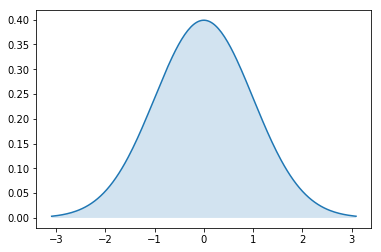

Crit values:
(-1.0364333894937898, 1.0364333894937898)
Criterion value: -0.9456554081394523
P-value: 0.17216218672720102
H0


In [25]:
def v6():
    sample1 = Sample.from_data(
        '1',
        np.array([36.90, 34.47, 33.78, 30.72, 33.04, 37.09, 34.94, 36.73, 30.69, 35.68])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([32.26, 29.95, 39.11, 40.90, 38.73, 34.21, 31.79, 37.27, 40.88, 32.88])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = Z2Hyp(kind=AltHypKind.LEFT, sigma1=2.7, sigma2=3.8)
    alpha = 0.15
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v6()


Sample 1: m=27.72857142857143, s=1.1686377906410037, s^2=1.3657142857142863
Sample 2: m=29.199999999999992, s=0.9715966241192898, s^2=0.9440000000000005


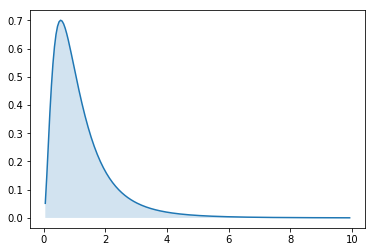

Crit values:
(0.34049106026289289, 2.4605819674472413)
Criterion value: 1.446731234866828
P-value: 0.5769743476827027
H0


In [13]:
def v7():
    sample1 = Sample.from_data(
        '1',
        np.array([27.8, 27.6, 26.4, 28.1, 29.3, 26.1, 28.8])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([29.2, 28.4, 28.9, 30.4, 30.4, 30.3, 29.4, 28.2, 28.9, 27.4, 29.7])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = FHyp(kind=AltHypKind.TWO_SIDED, sample1=sample1, sample2=sample2)
    alpha = 0.20
    
    real_dist1 = stats.norm(27.8, 0.9)
    real_dist2 = stats.norm(29.3, 0.9)
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v7()

Sample 1: m=28.973000000000003, s=2.5445979817819726, s^2=6.474978888888888
Sample 2: m=34.372, s=2.4337250826208323, s^2=5.923017777777777


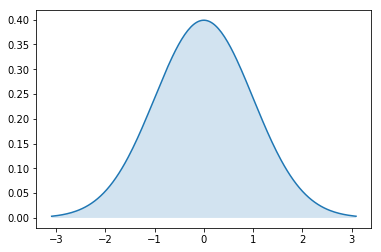

Crit values:
(-0.67448975019608171, 0.67448975019608171)
Criterion value: -6.20841348627239
P-value: 2.676108686802941e-10
H1


In [21]:
def v8():
    sample1 = Sample.from_data(
        '1',
        np.array([29.29, 30.04, 33.29, 26.00, 31.47, 26.05, 29.02, 25.34, 30.23, 29.00])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([34.11, 32.81, 38.75, 35.70, 31.51, 36.72, 34.38, 30.49, 35.32, 33.93])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = Z2Hyp(kind=AltHypKind.LEFT, sigma1=2.2, sigma2=1.65)
    alpha = 0.25
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')

v8()


Sample 1: m=34.403999999999996, s=2.3662027714368765, s^2=5.598915555555555
Sample 2: m=35.797999999999995, s=4.047042267027997, s^2=16.37855111111111


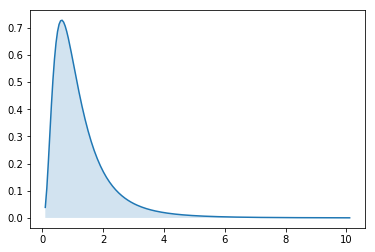

Crit values:
(0.53131475620518898, 1.882123521549266)
Criterion value: 2.9253077580102818
P-value: 0.9372099085495443
H0


In [23]:
def v9():
    sample1 = Sample.from_data(
        '1',
        np.array([36.90, 34.47, 33.78, 30.72, 33.04, 37.09, 34.94, 36.73, 30.69, 35.68])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([32.26, 29.95, 39.11, 40.90, 38.73, 34.21, 31.79, 37.27, 40.88, 32.88])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = FHyp(kind=AltHypKind.LEFT, sample1=sample1, sample2=sample2)
    alpha = 0.18
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v9()


Sample 1: m=10.4738, s=0.3382339098579234, s^2=0.11440217777777785
Sample 2: m=10.155, s=0.7901933659273253, s^2=0.6244055555555558


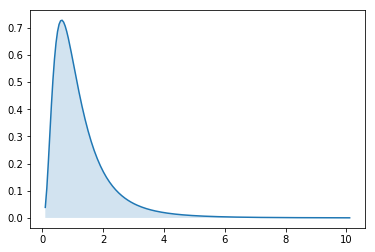

Crit values:
(0.40977889172652099, 2.4403404377094704)
Criterion value: 5.457986619524335
P-value: 0.018710368845190173
H1


In [17]:
def v10():
    sample1 = Sample.from_data(
        '1',
        np.array([10.73, 9.878, 10.12, 10.58, 10.56, 10.50, 10.93, 10.32, 10.23, 10.89])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([ 9.60, 11.37,  9.77,  9.20, 10.70,  9.28, 10.44, 10.26, 11.31,  9.62])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = FHyp(kind=AltHypKind.TWO_SIDED, sample1=sample1, sample2=sample2)
    alpha = 0.20
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')
    
v10()


Sample 1: m=2.671, s=0.5064571935404697, s^2=0.2564988888888888
Sample 2: m=3.0410000000000004, s=0.197678189658512, s^2=0.03907666666666664


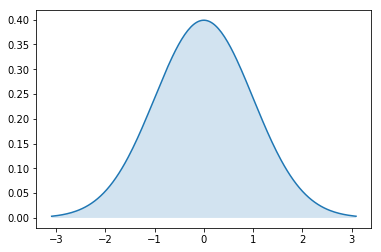

Crit values:
(-1.0364333894937898, 1.0364333894937898)
Criterion value: -1.8500000000000028
P-value: 0.0321567747956135
H1


In [12]:
def v11():
    sample1 = Sample.from_data(
        '1',
        np.array([2.89, 3.26, 2.52, 2.41, 3.28, 2.17, 2.57, 1.67, 3.04, 2.90])
    )
    sample2 = Sample.from_data(
        '2',
        np.array([3.34, 2.86, 3.26, 3.14, 2.97, 3.23, 2.97, 3.04, 2.87, 2.73])
    )
    
    sample1.describe()
    sample2.describe()
    
    hyp = Z2Hyp(kind=AltHypKind.LEFT, sigma1=0.6, sigma2=0.2)
    alpha = 0.15
    
    plot_dist(hyp.dist)
    
    print('Crit values:')
    print(hyp.critical_values(alpha))
    
    criterion_value, _, p_value, result = hyp.full_test(sample1, sample2, alpha)
    print('Criterion value: {}'.format(criterion_value))
    print('P-value: {}'.format(p_value))
    print('H0' if result else 'H1')

v11()
